# 1. Keras input and dense layers

In [1]:
from keras.layers import Input, Dense, Embedding, Flatten, Input, Add, Concatenate
from keras.models import Model
from keras.utils import plot_model

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
input_tensor = Input(shape=(1,))
input_tensor

<tf.Tensor 'input_1:0' shape=(?, 1) dtype=float32>

In [3]:
output_layer = Dense(1)
output_layer

In [4]:
output_tensor = output_layer(input_tensor)
output_tensor

Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'dense_1/BiasAdd:0' shape=(?, 1) dtype=float32>

## 1.1 Keras models

In [5]:
model = Model(input_tensor, output_tensor)
model.compile(optimizer="adam", loss="mae")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_tensor = Input(shape=(1,))
output_layer = Dense(1, name="Predicted-Score-Diff")
output_tensor = output_layer(input_tensor)
model = Model(input_tensor, output_tensor)
plot_model(model, to_file ="model.png")

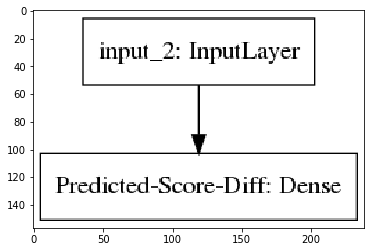

In [7]:
img = plt.imread("model.png")
plt.imshow(img)
plt.show()

## 1.2. Fit and evaluate a model

In [8]:
games_tourney = pd.read_csv("data/basketball_data/games_tourney.csv")
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [9]:
games_tourney.describe()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
count,4234.000000,4234.000000,4234.000000,4234.0,4234.000000,4234.00000,4234.000000,4234.000000,4234.000000
mean,2001.193198,5589.146906,5589.146906,0.0,0.000000,0.00000,71.131318,71.131318,0.500000
std,9.562753,3057.852421,3057.852421,0.0,7.546094,14.69144,12.942613,12.942613,0.500059
min,1985.000000,24.000000,24.000000,0.0,-15.000000,-58.00000,29.000000,29.000000,0.000000
25%,1993.000000,3234.000000,3234.000000,0.0,-5.000000,-10.00000,62.000000,62.000000,0.000000
50%,2001.000000,5284.000000,5284.000000,0.0,0.000000,0.00000,71.000000,71.000000,0.500000
75%,2010.000000,8456.500000,8456.500000,0.0,5.000000,10.00000,79.000000,79.000000,1.000000
max,2017.000000,10851.000000,10851.000000,0.0,15.000000,58.00000,149.000000,149.000000,1.000000


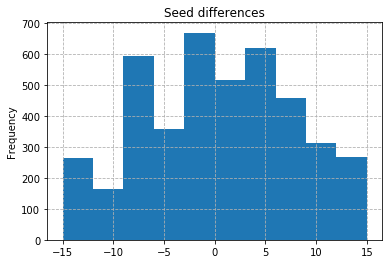

In [10]:
games_tourney[["seed_diff"]].plot.hist(legend=False, title="Seed differences").grid(linestyle="--")

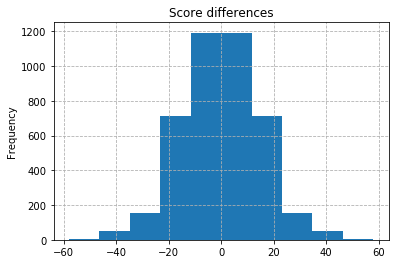

In [11]:
games_tourney[["score_diff"]].plot.hist(legend=False, title="Score differences").grid(linestyle="--")

In [12]:
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)
model.compile(optimizer="adam", loss="mae")
model

In [13]:
model.fit(games_tourney["seed_diff"],
          games_tourney["score_diff"],
          batch_size=64,
          validation_split=.20,
          verbose=True)

Instructions for updating:
Use tf.cast instead.
Train on 3387 samples, validate on 847 samples
Epoch 1/1
3387/3387 [==============================] - 1s 148us/step - loss: 12.8022 - val_loss: 12.0284


In [14]:
games_season = pd.read_csv("data/basketball_data/games_season.csv")
games_season.describe()

,season,team_1,team_2,home,score_diff,score_1,score_2,won
count,312178.000000,312178.000000,312178.000000,312178.000000,312178.000000,312178.000000,312178.000000,312178.000000
mean,2002.676749,5450.778492,5450.778492,0.500000,0.000000,70.705495,70.705495,0.500000
std,9.783009,3136.715798,3136.715798,0.500001,15.336096,13.212275,13.212275,0.500001
min,1985.000000,0.000000,0.000000,0.000000,-91.000000,20.000000,20.000000,0.000000
25%,1994.000000,2749.000000,2749.000000,0.000000,-10.000000,62.000000,62.000000,0.000000
50%,2003.000000,5441.000000,5441.000000,0.500000,0.000000,70.000000,70.000000,0.500000
75%,2011.000000,8169.000000,8169.000000,1.000000,10.000000,79.000000,79.000000,1.000000
max,2018.000000,10887.000000,10887.000000,1.000000,91.000000,186.000000,186.000000,1.000000


In [15]:
games_season_enriched = pd.read_csv("data/basketball_data/games_season_enriched.csv")
games_season_enriched.describe()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
count,4234.000000,4234.000000,4234.000000,4234.0,4234.000000,4234.00000,4234.000000,4234.000000,4234.000000,4.234000e+03
mean,2001.193198,5589.146906,5589.146906,0.0,0.000000,0.00000,71.131318,71.131318,0.500000,-2.372374e-15
std,9.562753,3057.852421,3057.852421,0.0,7.546094,14.69144,12.942613,12.942613,0.500059,1.212638e+01
min,1985.000000,24.000000,24.000000,0.0,-15.000000,-58.00000,29.000000,29.000000,0.000000,-5.011823e+01
25%,1993.000000,3234.000000,3234.000000,0.0,-5.000000,-10.00000,62.000000,62.000000,0.000000,-7.116314e+00
50%,2001.000000,5284.000000,5284.000000,0.0,0.000000,0.00000,71.000000,71.000000,0.500000,-3.961275e-12
75%,2010.000000,8456.500000,8456.500000,0.0,5.000000,10.00000,79.000000,79.000000,1.000000,7.116314e+00
max,2017.000000,10851.000000,10851.000000,0.0,15.000000,58.00000,149.000000,149.000000,1.000000,5.011823e+01


In [16]:
model.evaluate(games_season_enriched["seed_diff"], games_season_enriched["score_diff"])

4234/4234 [==============================] - 0s 19us/step


12.557206093054308

# 2. Category embeddings

In [17]:
"""inputs"""
input_tensor = Input(shape=(1,))

"""embedding layer"""
n_teams = 10887

embed_layer = Embedding(input_dim=n_teams,
                        input_length=1,
                        output_dim=1,
                        name="Team-Strength-Lookup")

embed_tensor = embed_layer(input_tensor)

"""flattening"""
flatten_tensor = Flatten()(embed_tensor)

model = Model(input_tensor, flatten_tensor)
model

In [18]:
plot_model(model, "category-embeddings.png")

![category embeddings](category-embeddings.png)

## 2.1. Shared layers

In [19]:
input_tensor_1 = Input((1,))
input_tensor_2 = Input((1,))
output_tensor_1 = model(input_tensor_1)
output_tensor_2 = model(input_tensor_2)

output_tensor_1, output_tensor_2

(<tf.Tensor 'model_4/flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'model_4_1/flatten_1/Reshape:0' shape=(?, ?) dtype=float32>)

## 2.2. Merge layers

In [20]:
in_tensor_1 = Input((1,))
in_tensor_2 = Input((1,))
out_tensor = Add()([in_tensor_1, in_tensor_2])
out_tensor

<tf.Tensor 'add_1/add:0' shape=(?, 1) dtype=float32>

In [21]:
model = Model([in_tensor_1, in_tensor_2], out_tensor)
model.compile(optimizer="adam", loss="mean_absolute_error")
model

In [22]:
plot_model(model, "merge-layers.png")

![merge layers](merge-layers.png)

## 2.3. Fitting and predicting with multiple inputs

In [23]:
model.predict([np.array([[1]]), np.array([[2]])])

array([[3.]], dtype=float32)

In [24]:
model.predict([np.array([[42]]), np.array([[119]])])

array([[161.]], dtype=float32)

In [25]:
model.evaluate([np.array([[-1]]), np.array([[-2]])], np.array([[-3]]))

1/1 [==============================] - 0s 70ms/step


0.0

# 3. Three-input models

In [26]:
in_tensor_1 = Input((1,))
in_tensor_2 = Input((1,))
in_tensor_3 = Input((1,))

out_tensor = Concatenate()([in_tensor_1, in_tensor_2, in_tensor_3])
output_tensor = Dense(1)(out_tensor)
output_tensor

<tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 1) dtype=float32>

In [27]:
model = Model([in_tensor_1, in_tensor_2, in_tensor_3], out_tensor)
model

In [28]:
plot_model(model, to_file="three-input-models.png")

![three input models](./three-input-models.png)

In [29]:
shared_layer = Dense(1)
shared_tensor_1 = shared_layer(in_tensor_1)
shared_tensor_2 = shared_layer(in_tensor_1)
out_tensor = Concatenate()([shared_tensor_1, shared_tensor_2, in_tensor_3])
out_tensor = Dense(1)(out_tensor)
out_tensor

<tf.Tensor 'dense_5/BiasAdd:0' shape=(?, 1) dtype=float32>

In [30]:
model = Model([in_tensor_1, in_tensor_2, in_tensor_3], out_tensor)
model.compile(loss="mae", optimizer="adam")

plot_model(model, "shared-layers-3-inputs.png")

![shared layers with 3 inuts](shared-layers-3-inputs.png)